## imports

In [46]:
import tensorflow._api.v2.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()
from PIL import Image 
# print('Pillow Version:', PIL.__version__)
from numpy import asarray

import matplotlib.pyplot as plt

## initialization

In [47]:
# variables
pixels_radius = 6  # minus 1
features = (pixels_radius**2) - 1
hidden_layer_nodes = (20)
categories = 1
x = tf.placeholder(tf.float32, [None, features])

w1 = tf.Variable(tf.truncated_normal([features,hidden_layer_nodes], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden_layer_nodes]))
z1 = tf.nn.relu(tf.add(tf.matmul(x,w1),b1))

w2 = tf.Variable(tf.truncated_normal([hidden_layer_nodes,categories], stddev=0.1))
b2 = tf.Variable(0.)
z2 = tf.matmul(z1,w2) + b2

y = tf.placeholder(tf.float32, [None, categories])

# functions
pred = z2
loss = tf.reduce_mean(tf.pow(pred-y, 2))
update = tf.train.AdamOptimizer().minimize(loss)



## data function


In [48]:
def get_XY_from_image(photo_name:str,color:int,jumps:int=100,show:bool=False):
    data = asarray(Image.open(photo_name))
    color_arr = data[:,:,color]
    image_color_arr = Image.fromarray(color_arr)
    if show: image_color_arr.show()
    data_x = []
    data_y = []
    print(f"pic size: {len(color_arr)}x{len(color_arr[0])} name: {photo_name}")
    for i in range(int(pixels_radius/2),len(color_arr)-int(pixels_radius/2),jumps):
        for j in range(int(pixels_radius/2),len(color_arr[0])-int(pixels_radius/2)):
            temp_y = [color_arr[i][j]]
            temp_x = []
            for k in range(i-int(pixels_radius/2),i+int(pixels_radius/2)):
                for l in range(j-int(pixels_radius/2),j+int(pixels_radius/2)):
                    if(k==i and l==j):
                        continue
                    temp_x.append(color_arr[k][l])
            data_y.append(temp_y)
            data_x.append(temp_x)
    return (data_x,data_y)

def load_pic_data(pics_array,color:int,jumps:int=100,show:bool=False):
    data_x , data_y = get_XY_from_image(pics_array[0],color,jumps,show)
    for i in pics_array[1:]:
        data_tmp_x , data_tmp_y = get_XY_from_image(i,color,jumps,show)
        data_x = np.append(data_x,data_tmp_x,axis=0)
        data_y = np.append(data_y,data_tmp_y,axis=0)
    data_x = np.array(data_x)
    data_y = np.array(data_y)
    return data_x,data_y

## data

In [49]:
data_x , data_y = load_pic_data(
    ["data/cat_test.jpg", "data/balloon.jpg","data/cat.jpg","data/city.jpg",
    "data/city_night.jpg","data/city_color.jpg","data/sky.jpg",
    "data/flower.jpg","data/telescope.jpg","data/moon.jpg"],
    color=0,jumps=100)
data_t_x , data_t_y = load_pic_data(["data/park.jpg","data/cloud.jpg"],color=1,jumps=100)


pic size: 681x1024 name: data/cat_test.jpg
pic size: 480x720 name: data/balloon.jpg
pic size: 576x1024 name: data/cat.jpg
pic size: 664x1080 name: data/city.jpg
pic size: 1282x2278 name: data/city_night.jpg
pic size: 539x959 name: data/city_color.jpg
pic size: 1080x1920 name: data/sky.jpg
pic size: 600x800 name: data/flower.jpg
pic size: 464x696 name: data/telescope.jpg
pic size: 708x1280 name: data/moon.jpg
pic size: 588x830 name: data/park.jpg
pic size: 319x600 name: data/cloud.jpg


## sim

In [61]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

show = 50
loss_in_time = []
w_arr = []
w2_arr = []
test_over_time = []

for i in range(0,10000):
       sess.run(update, feed_dict = {x:data_x, y:data_y})
       if(i%show==0 and i>300):
              tmp = sess.run(loss,feed_dict={x:data_x,y:data_y})
              loss_in_time.append(tmp)
              w_arr.append(sess.run(w1))
              w2_arr.append(sess.run(w2))
              if(i%(show*1)==0):
                     print(f"i = {i}, loss = {tmp},")
              test_over_time.append(sess.run(loss,feed_dict={x:data_t_x,y:data_t_y}))

i = 350, loss = 65.61021423339844,
i = 400, loss = 59.7007942199707,
i = 450, loss = 56.371971130371094,
i = 500, loss = 52.35342025756836,
i = 550, loss = 50.11259460449219,
i = 600, loss = 48.110755920410156,
i = 650, loss = 46.30636978149414,
i = 700, loss = 44.669639587402344,
i = 750, loss = 43.15680694580078,
i = 800, loss = 41.749786376953125,
i = 850, loss = 40.5902099609375,
i = 900, loss = 39.546443939208984,
i = 950, loss = 38.619380950927734,
i = 1000, loss = 37.80802917480469,
i = 1050, loss = 37.14780807495117,
i = 1100, loss = 36.52604675292969,
i = 1150, loss = 35.943809509277344,
i = 1200, loss = 35.579833984375,
i = 1250, loss = 34.97639846801758,
i = 1300, loss = 34.5501594543457,
i = 1350, loss = 34.143375396728516,
i = 1400, loss = 33.805763244628906,
i = 1450, loss = 33.4532356262207,
i = 1500, loss = 33.13862991333008,
i = 1550, loss = 32.95503616333008,
i = 1600, loss = 32.5892219543457,
i = 1650, loss = 32.33836364746094,
i = 1700, loss = 32.09222412109375,
i =

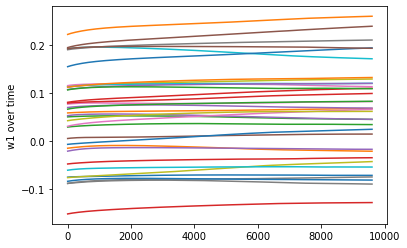

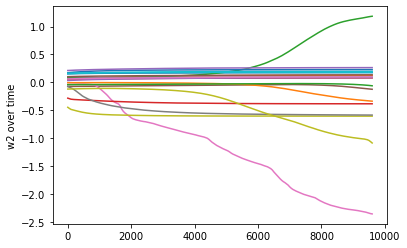

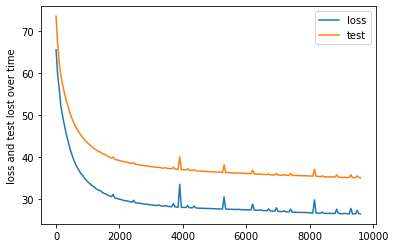

In [62]:
d = np.array(np.array(w_arr).transpose()[0]).transpose()
plt.plot(list(i*show for i in range(len(d))),d)
plt.ylabel('w1 over time')
plt.show()

d = np.array(np.array(w2_arr).transpose()[0]).transpose()
plt.plot(list(i*show for i in range(len(d))),d)
plt.ylabel('w2 over time')
plt.show()

plt.plot(list(i*show for i in range(len(loss_in_time))),loss_in_time,label ="loss")
plt.plot(list(i*show for i in range(len(test_over_time))),test_over_time , label ="test")
plt.legend()
plt.ylabel('loss and test lost over time')
plt.show()


In [63]:
pictureR,y_dataR = load_pic_data(["data/park.jpg"],color=0,jumps=1)
pictureG,y_dataG = load_pic_data(["data/park.jpg"],color=1,jumps=1)
pictureB,y_dataB = load_pic_data(["data/park.jpg"],color=2,jumps=1)
pR = sess.run(tf.nn.relu(z2),feed_dict={x:pictureR})
pG = sess.run(tf.nn.relu(z2),feed_dict={x:pictureG})
pB = sess.run(tf.nn.relu(z2),feed_dict={x:pictureB})
print(pR)
size_x = 588 
size_y = 830

arr = np.zeros((size_x-pixels_radius,size_y-pixels_radius,3))
arr[:,:,0] = np.reshape(pictureR.transpose()[0].transpose(),(size_x-pixels_radius,size_y-pixels_radius))
arr[:,:,1] = np.reshape(pictureG.transpose()[0].transpose(),(size_x-pixels_radius,size_y-pixels_radius))
arr[:,:,2] = np.reshape(pictureB.transpose()[0].transpose(),(size_x-pixels_radius,size_y-pixels_radius))

arr2 = np.zeros((size_x-pixels_radius,size_y-pixels_radius,3))
arr2[:,:,0] = np.reshape(y_dataR,(size_x-pixels_radius,size_y-pixels_radius))
arr2[:,:,1] = np.reshape(y_dataG,(size_x-pixels_radius,size_y-pixels_radius))
arr2[:,:,2] = np.reshape(y_dataB,(size_x-pixels_radius,size_y-pixels_radius))
arr_concatinated = np.concatenate((arr2.astype('uint8'),arr.astype('uint8')), axis=1)

img = Image.fromarray(arr_concatinated.astype('uint8'),mode="RGB")
img.show(title="calculated")


pic size: 588x830 name: data/park.jpg
pic size: 588x830 name: data/park.jpg
pic size: 588x830 name: data/park.jpg
[[192.45898]
 [194.24184]
 [197.83144]
 ...
 [183.34854]
 [179.04857]
 [173.02835]]
